In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pos = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_pos_cash_balance.csv')


In [3]:
pos

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279
...,...,...,...,...,...,...,...,...
8543370,2340627,-2,NaN,NaN,Signed,0,0,284649
8543371,1011796,-2,6.0,6.0,Active,0,0,69172
8543372,1298851,-1,12.0,12.0,Active,0,0,151122
8543373,1550592,-1,1.0,0.0,Completed,0,0,56549


In [11]:
print(pos.head())

   SK_ID_PREV  MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
0     1803195             -31            48.0                   45.0   
1     1803195             -17            48.0                   31.0   
2     1803195             -21            48.0                   35.0   
3     1803195              -8            48.0                   21.0   
4     1803195              -4            48.0                   17.0   

  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  SK_ID_CURR  
0               Active       0           0      185279  
1               Active       0           0      185279  
2               Active       0           0      185279  
3               Active       0           0      185279  
4               Active       0           0      185279  


## Null Values Check

In [13]:
check_null = pos.isna().sum().sort_values(ascending=False)
percentage = ((pos.isnull().sum()/len(pos)*100)).sort_values(ascending=False)
null_cols = pd.concat([check_null, percentage], axis=1, keys=['Count','Percentage'])
print('Distributions of Missing values:')
null_cols.head(20)

Distributions of Missing values:


,Count,Percentage
CNT_INSTALMENT_FUTURE,21878,0.256081
CNT_INSTALMENT,21863,0.255906
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_ID_CURR,0,0.000000


In [14]:
print('Columns that contain more than 90% missing values:')
more90_cols = pos.loc[:,(pos.isnull().sum(axis = 0) / pos.shape[0]) >= 0.9].columns
more90_cols

Columns that contain more than 90% missing values:


Index([], dtype='object')

NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

## Duplicates Check

In [15]:
pos.duplicated().sum()

0

## Outliers Check

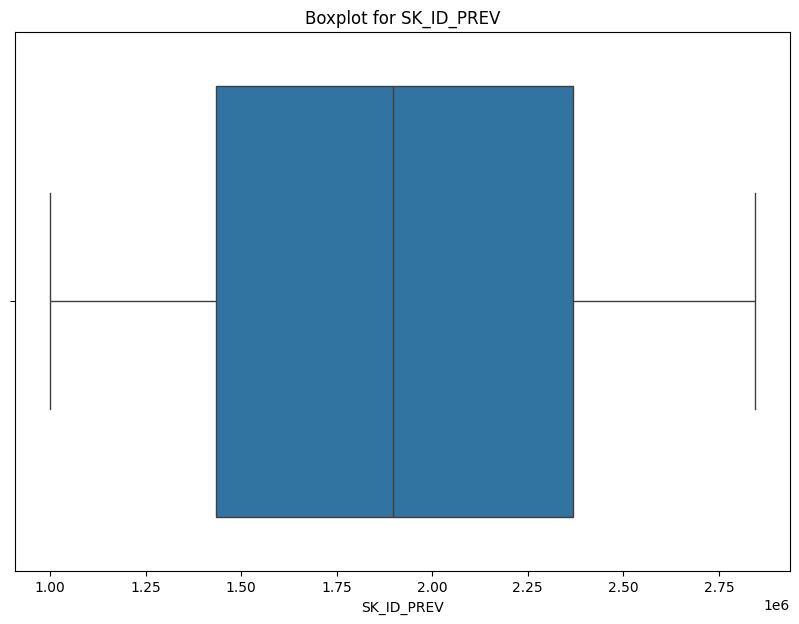

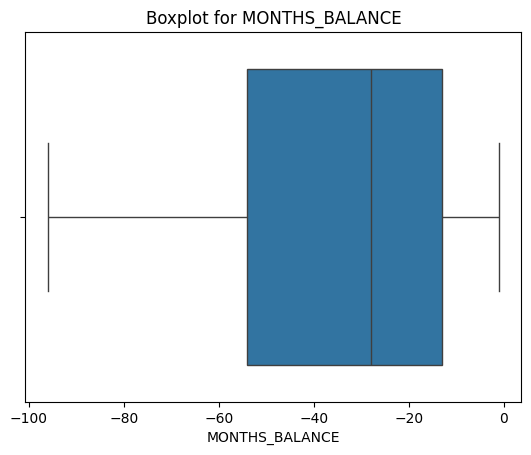

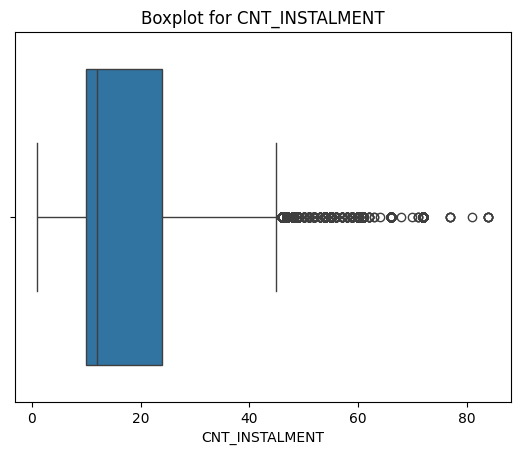

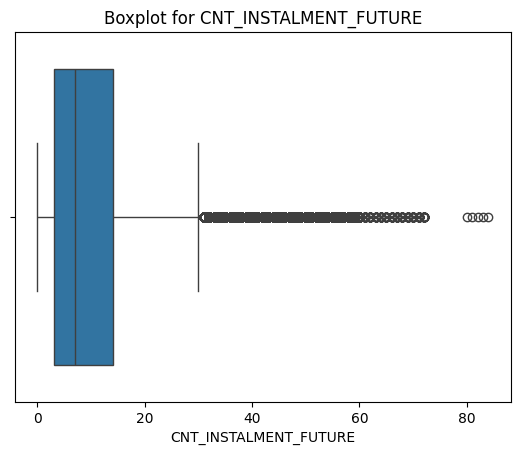

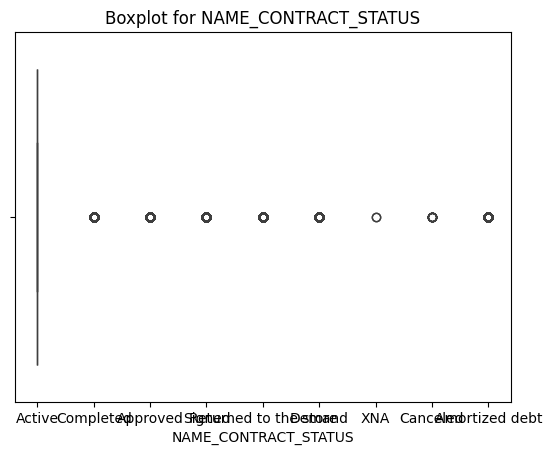

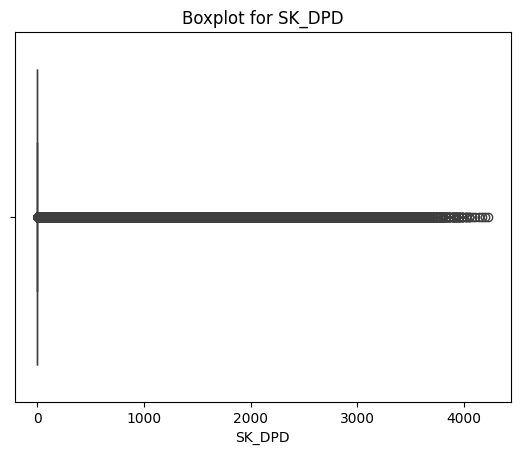

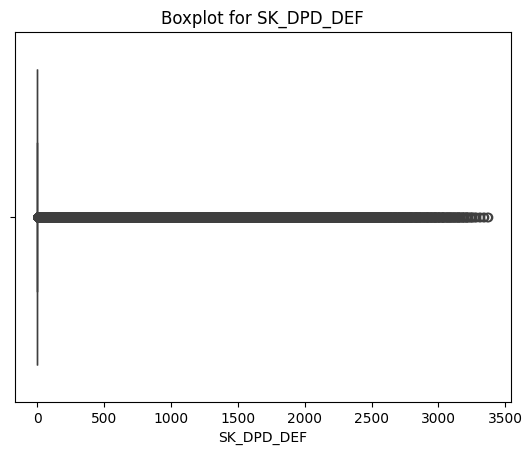

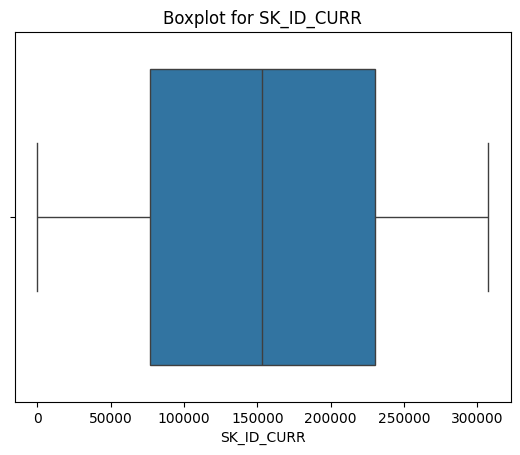

In [9]:
plt.figure(figsize=(10, 7))

for column in pos.columns:
    sns.boxplot(x=pos[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

# Data Exploration

In [4]:
num_data = pos._get_numeric_data()
cate_data = pos.drop(columns=num_data.columns)
cate_data = pos.drop(columns=num_data.columns)

## Numerical Data

In [18]:
for i in num_data.columns:
    great0 = pos[i][pos[i] > 0].count()
    equal0 =  pos[i][pos[i] == 0].count()
    small0 = pos[i][pos[i] < 0].count()
    nan_total = pos[i].isnull().sum()
    other_value = pos.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{i}  has  {great0} values greater than 0,  {equal0} values equal to 0,  {small0} values less than 0,  NaN: {nan_total},  other values: {other_value}')

SK_ID_PREV  has  8543375 values greater than 0,  0 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
MONTHS_BALANCE  has  0 values greater than 0,  0 values equal to 0,  8543375 values less than 0,  NaN: 0,  other values: 0
CNT_INSTALMENT  has  8521512 values greater than 0,  0 values equal to 0,  0 values less than 0,  NaN: 21863,  other values: 0
CNT_INSTALMENT_FUTURE  has  7499563 values greater than 0,  1021934 values equal to 0,  0 values less than 0,  NaN: 21878,  other values: 0
SK_DPD  has  259107 values greater than 0,  8284268 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
SK_DPD_DEF  has  99110 values greater than 0,  8444265 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0
SK_ID_CURR  has  8543360 values greater than 0,  15 values equal to 0,  0 values less than 0,  NaN: 0,  other values: 0



## Categorical Data

In [19]:
for i in cate_data.columns[:8]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

col NAME_CONTRACT_STATUS : ['Active', 'Completed', 'Approved', 'Signed', 'Returned to the store', 'Demand', 'XNA', 'Canceled', 'Amortized debt']



In [20]:
for i in cate_data.columns[8:]:
    print(f'col {i} : {list(cate_data[i].unique())}\n')

# EDA Internal

## Univariate Analysis

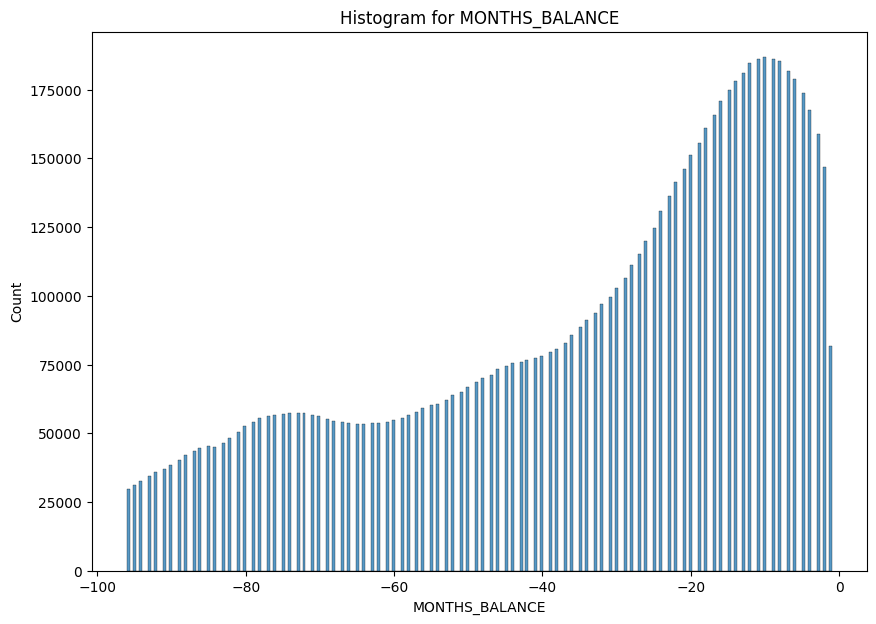

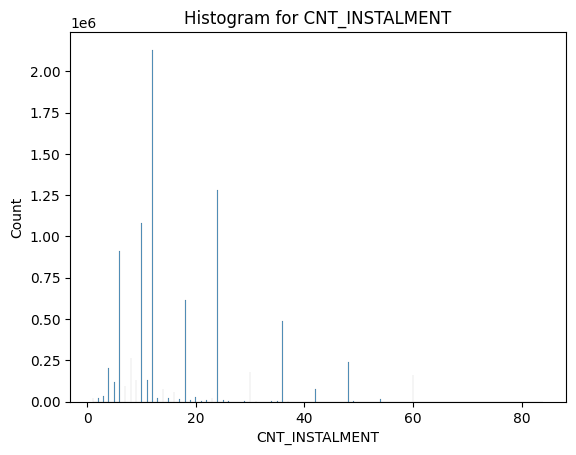

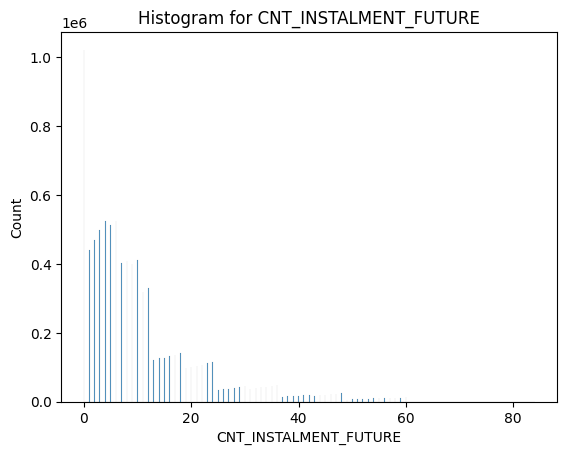

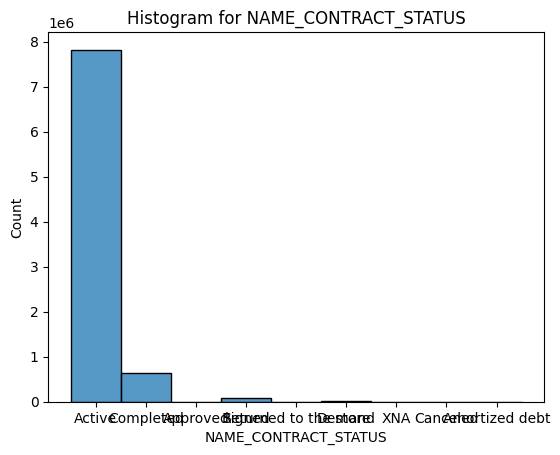

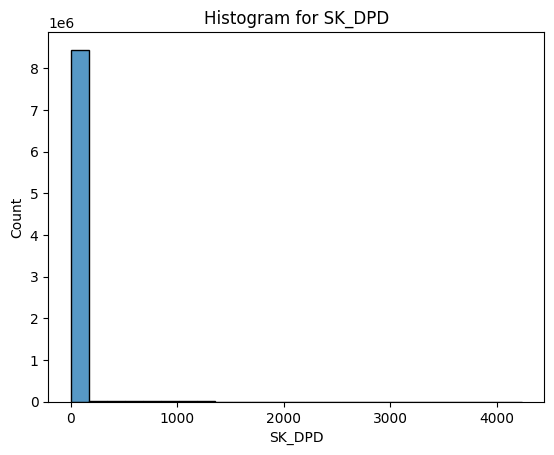

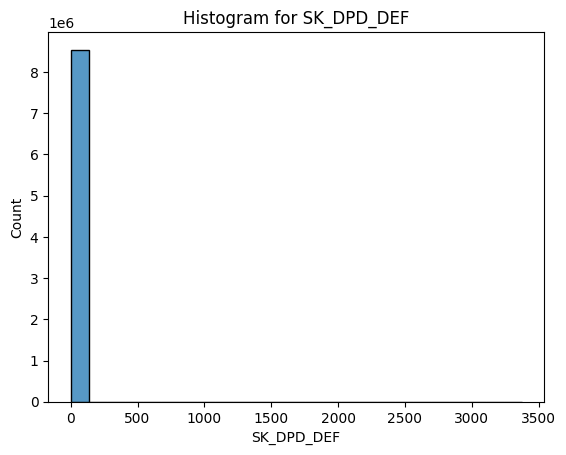

In [22]:
plt.figure(figsize=(10, 7))

for column in pos.iloc[:,1:7]:
    sns.histplot(x=pos[column])

    plt.title(f'Histogram for {column}')

    plt.show()

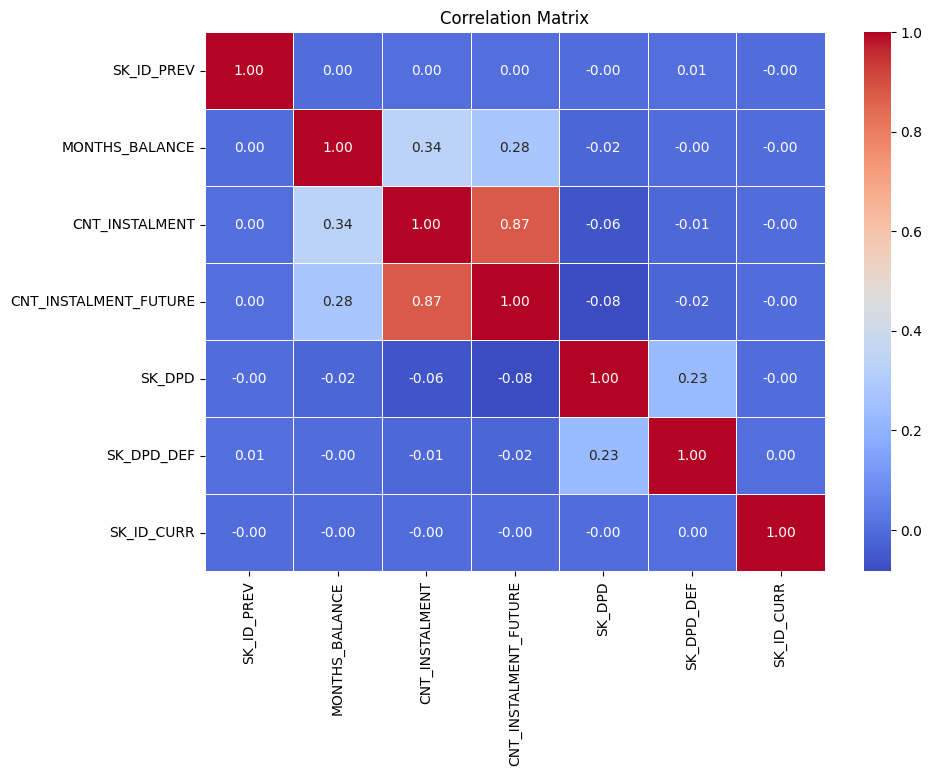

In [24]:
correlation_matrix = pos.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Features that have high correlation: 
* CNT_INSTALMENT - CNT_INSTALMENT_FUTURE

# EDA External

In [5]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [7]:
merge_table = pd.merge(pos,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,1803195,-31,48.0,45.0,Active,0,0,185279,0.0
1,1803195,-17,48.0,31.0,Active,0,0,185279,0.0
2,1803195,-21,48.0,35.0,Active,0,0,185279,0.0
3,1803195,-8,48.0,21.0,Active,0,0,185279,0.0
4,1803195,-4,48.0,17.0,Active,0,0,185279,0.0


In [8]:
num_data.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR'],
      dtype='object')

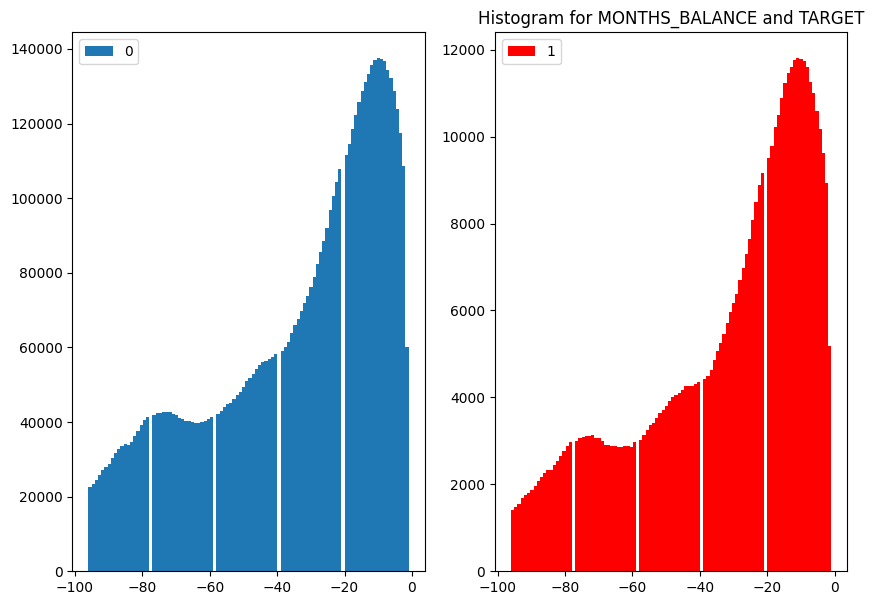

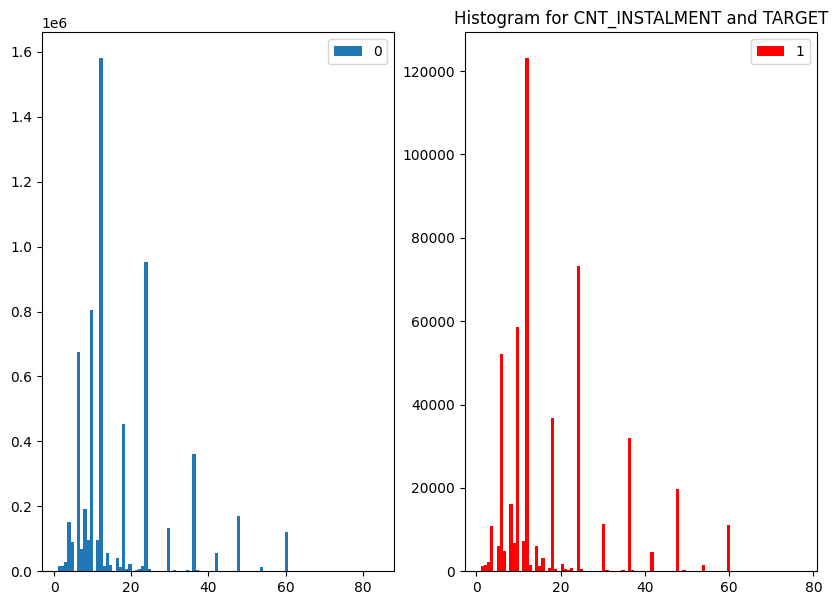

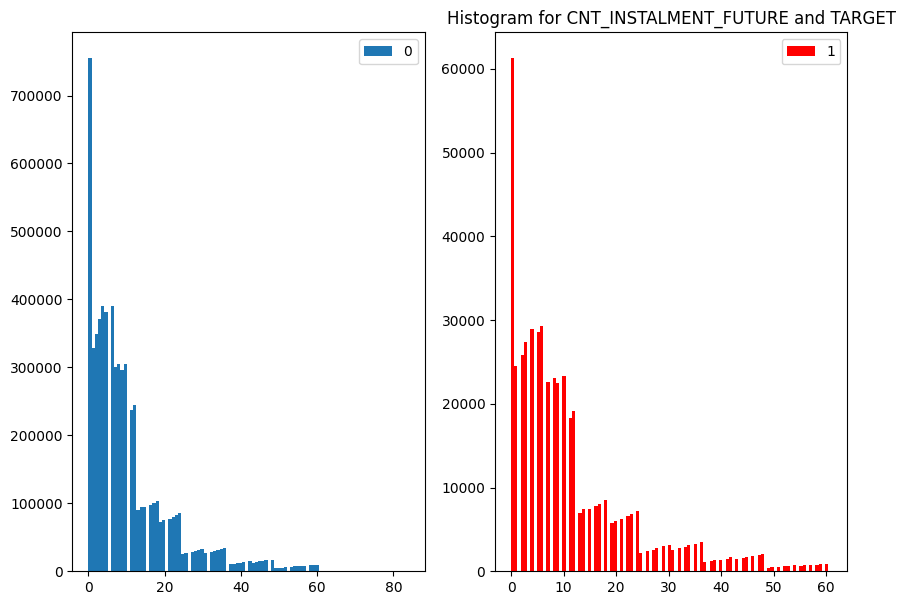

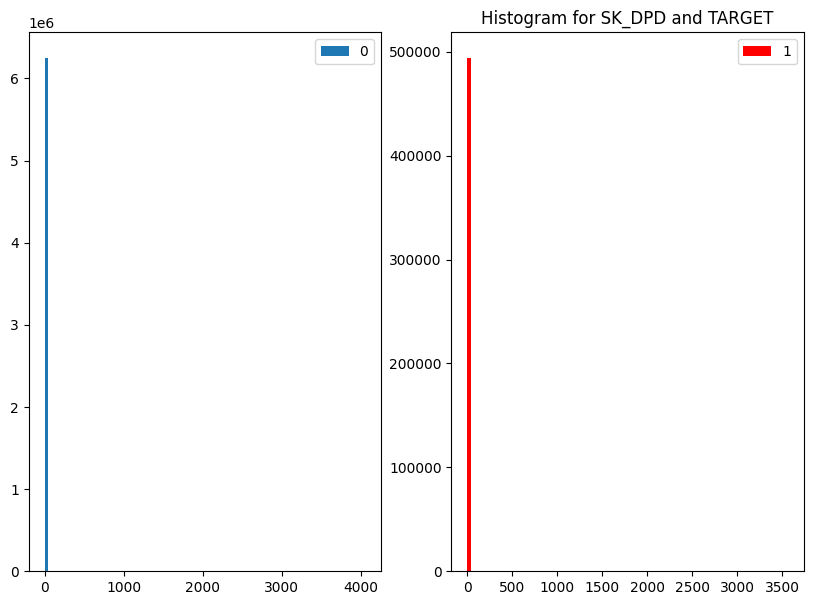

In [9]:
for col in num_data.iloc[:,1:5]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    class0 = merge_table[merge_table['TARGET']==0][col]
    class1 = merge_table[merge_table['TARGET']==1][col]
    ax[0].hist(class0,bins = 100,label = 0)
    ax[1].hist(class1,bins = 100,color = 'red',label= 1)
    ax[0].legend()
    ax[1].legend()
    plt.title(f'Histogram for {col} and TARGET')